In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score
import numpy as np
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor

In [2]:
df=pd.read_csv('finaldata.csv')

In [3]:
df.head()

,AdminName,GeoRegion,GeoSubreg,IncomeGrp,LendCat,VarDesc,UrbanPop,RuralPop,TotalPop,UrbanLA,RuralLA,TotalLA
0,Syrian Arab Republic,Asia,Western Asia,Low income,IDA,Elevation under 5 meters,30620.145664,1.084850e+04,4.146865e+04,15.427241,22.357709,37.784950
1,Togo,Africa,Western Africa,Low income,IDA,Elevation under 5 meters,55219.074696,1.553526e+05,2.105717e+05,27.818326,205.311436,233.129761
2,Mozambique,Africa,Eastern Africa,Low income,IDA,Elevation between 50 and 100 meters,279377.806046,2.166789e+06,2.446166e+06,386.302173,93757.456316,94143.758488
3,Burkina Faso,Africa,Western Africa,Low income,IDA,Elevation between 400 and 800 meters,637.095442,8.170922e+03,8.808017e+03,134.234603,9032.678212,9166.912815
4,South Sudan,Africa,Eastern Africa,Low income,IDA,Elevation between 800 and 1500 meters,277.162453,7.758986e+04,7.786702e+04,65.242679,33046.173375,33111.416054


In [4]:
df1=df[['GeoSubreg','IncomeGrp','VarDesc','TotalLA','TotalPop']]

In [5]:
df1=df1[df1['TotalPop']<=1.000000e+06]

In [6]:
df1=df1[df1['TotalPop']>=1.000000e+04]

In [7]:
df1=df1[df1['VarDesc'].isin(['Elevation under 5 meters',
       'Elevation between 800 and 1500 meters',
       'Elevation between 200 and 400 meters',
       'Elevation between 1500 and 3000 meters',
       'Elevation between 50 and 100 meters',
       'Elevation between 25 and 50 meters',
       'Elevation between 400 and 800 meters',
       'Elevation between 5 and 10 meters',
       'Elevation between 10 and 25 meters',
       'Elevation between 100 and 200 meters',
       'Elevation between 3000 and 5000 meters',
       'Elevation over 5000 meters'])]

In [8]:
df1['VarDesc'].unique()

array(['Elevation under 5 meters',
       'Elevation between 800 and 1500 meters',
       'Elevation between 200 and 400 meters',
       'Elevation between 1500 and 3000 meters',
       'Elevation between 50 and 100 meters',
       'Elevation between 25 and 50 meters',
       'Elevation between 400 and 800 meters',
       'Elevation between 5 and 10 meters',
       'Elevation between 10 and 25 meters',
       'Elevation between 100 and 200 meters',
       'Elevation between 3000 and 5000 meters',
       'Elevation over 5000 meters'], dtype=object)

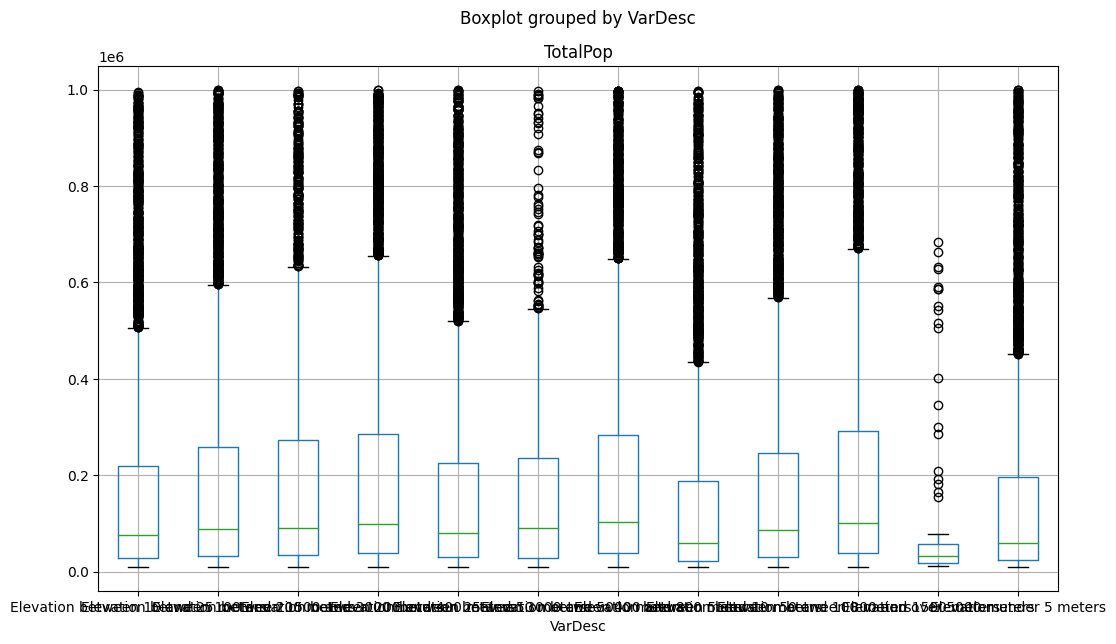

In [9]:
fig,ax=plt.subplots(1,1,figsize=(12,7))
df1.boxplot('TotalPop','VarDesc',ax=ax)
plt.show()

In [10]:
df1.shape

(54086, 5)

In [11]:
df1['IncomeGrp'].unique()

array(['Low income', 'Lower middle income', 'Upper middle income',
       'High income'], dtype=object)

In [12]:
df1['VarDesc'].unique()

array(['Elevation under 5 meters',
       'Elevation between 800 and 1500 meters',
       'Elevation between 200 and 400 meters',
       'Elevation between 1500 and 3000 meters',
       'Elevation between 50 and 100 meters',
       'Elevation between 25 and 50 meters',
       'Elevation between 400 and 800 meters',
       'Elevation between 5 and 10 meters',
       'Elevation between 10 and 25 meters',
       'Elevation between 100 and 200 meters',
       'Elevation between 3000 and 5000 meters',
       'Elevation over 5000 meters'], dtype=object)

In [13]:
df1['GeoSubreg'].unique()

array(['Western Asia', 'Western Africa', 'Eastern Africa', 'Eastern Asia',
       'Central Asia', 'Middle Africa', 'Southern Asia', 'Caribbean',
       'Eastern Europe', 'Central America', 'Melanesia',
       'Northern Africa', 'South-eastern Asia', 'Southern Africa',
       'South America', 'Micronesia', 'Southern Europe', 'Polynesia',
       'Australia and New Zealand', 'Western Europe', 'Northern Europe',
       'Northern America'], dtype=object)

In [14]:
df1.describe()

,TotalLA,TotalPop
count,5.408600e+04,54086.000000
mean,7.752979e+04,183924.568456
std,2.526762e+05,223870.561949
min,6.024030e-01,10000.402720
25%,3.252686e+03,31262.201890
50%,1.273433e+04,83862.467010
75%,4.709427e+04,247577.587930
max,3.415164e+06,999965.866231


In [15]:
le_Geo=LabelEncoder()
df1['GeoSubreg']=le_Geo.fit_transform(df1['GeoSubreg'])

le_Var=LabelEncoder()
df1['VarDesc']=le_Var.fit_transform(df1['VarDesc'])

le_Inc=LabelEncoder()
df1['IncomeGrp']=le_Inc.fit_transform(df1['IncomeGrp'])

In [16]:
df1['GeoSubreg'].unique()

array([20, 19,  4,  5,  3,  9, 17,  1,  6,  2,  7, 10, 15, 16, 14,  8, 18,
       13,  0, 21, 12, 11])

In [17]:
df1['VarDesc'].unique()

array([11,  9,  3,  2,  8,  4,  6,  7,  0,  1,  5, 10])

In [18]:
df1['IncomeGrp'].unique()

array([1, 2, 3, 0])

In [19]:
from sklearn.model_selection import train_test_split

X=df1.drop("TotalPop",axis=1)
y=df1['TotalPop']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
linear_reg=LinearRegression()
linear_reg.fit(X_train,y_train)
#linear_reg.score(y,y_test)

LinearRegression()

In [20]:
model=RandomForestRegressor(n_estimators=100)
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.23721843244903984

In [21]:
X_train.head()

,GeoSubreg,IncomeGrp,VarDesc,TotalLA
4229,4,1,2,15485.769214
23705,3,2,8,66309.545143
51278,1,3,8,63.195384
46343,2,3,9,449666.978303
94174,18,0,3,60799.313118


In [22]:
random_forest_reg=RandomForestRegressor(random_state=0)
random_forest_reg.fit(X,y.values)

RandomForestRegressor(random_state=0)

In [23]:
y_predict=random_forest_reg.predict(X)

In [24]:
error=np.sqrt(mean_squared_error(y,y_predict))

In [25]:
error

190866.4964572643

In [26]:
# accuracy = accuracy_score(y_test, y_predict)

In [27]:

#Input 
#df1=df[['GeoSubreg','IncomeGrp','VarDesc','UrbanPop','RuralPop','RuralLA','UrbanLA','TotalLA']]
tes=np.array([["Western Africa","Low income","Elevation between 400 and 800 meters",233.129761]])
tes[:,0]=le_Geo.transform(tes[:,0])
tes[:,1]=le_Inc.transform(tes[:,1])
tes[:,2]=le_Var.transform(tes[:,2])
tes=tes.astype(float)
tes

array([[ 19.      ,   1.      ,   6.      , 233.129761]])

In [28]:
tes_pred=linear_reg.predict(tes)

C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [29]:
tes_pred

array([184824.71629826])

In [30]:
import pickle

In [31]:
data={"model":linear_reg,"le_Geo":le_Geo, "le_Inc":le_Inc,"le_Var":le_Var}
with open('saved_steps.pkl',"wb") as file:
    pickle.dump(data,file)

In [32]:
with open('saved_steps.pkl','rb') as file:
    pickle.load(file)
regressor_loaded=data['model']
le_Geo=data['le_Geo']
le_Inc=data['le_Inc']
le_Var=data['le_Var']

In [33]:
tes_pred2=regressor_loaded.predict(tes)
tes_pred2

C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([184824.71629826])